In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = 'data.xlsx'
sheet_name = 'Данные_Задание_1'
file_path = r'C:\Users\PC\Desktop\Софт\Tina\data.xlsx'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [7]:
df.head()

,Субъект РФ,OID МО,Наименование МО,Адрес,ID здания,Наименование здания,План,Факт
0,Алтайский край,1.2.643.5.1.13.13.12.2.22.1671,"КГБУЗ "" ТРОИЦКАЯ ЦРБ""",Алтайский Край п Гордеевский пер Цветочный 14,31279.0,Пролетарская СВА,1,0
1,Алтайский край,1.2.643.5.1.13.13.12.2.22.1671,"КГБУЗ "" ТРОИЦКАЯ ЦРБ""",Алтайский Край с Горновое ул Молодежная 24,69319.0,Горновской ФАП,0,1
2,Алтайский край,1.2.643.5.1.13.13.12.2.22.1671,"КГБУЗ "" ТРОИЦКАЯ ЦРБ""",Алтайский Край с Еремино ул Школьная 19,69337.0,Ереминский ФАП,0,0
3,Алтайский край,1.2.643.5.1.13.13.12.2.22.1671,"КГБУЗ "" ТРОИЦКАЯ ЦРБ""",Алтайский Край с Заводское ул Ленина 43,31685.0,Заводская СВА,1,0
4,Алтайский край,1.2.643.5.1.13.13.12.2.22.1671,"КГБУЗ "" ТРОИЦКАЯ ЦРБ""",Алтайский Край с Зеленая Поляна ул 40 лет Побе...,69322.0,Зеленополянский ФАП,0,0


In [5]:
columns = {
    'Субъект РФ': 'Субъект РФ',
    'OID МО': 'OID МО',
    'Наименование МО': 'Наименование МО',
    'Адрес': 'Адрес',
    'ID здания': 'ID здания',
    'Наименование здания': 'Наименование здания',
    'План': 'План',
    'Факт': 'Факт'
}

In [6]:
df = df.drop_duplicates(subset=['OID МО', 'ID здания'])

In [8]:
# Группировка по субъектам РФ
grouped = df.groupby('Субъект РФ').agg(
    plan_count=('План', 'sum'),  # Количество плановых ТВСП (где План == 1)
    fact_in_plan=('Факт', lambda x: ((df.loc[x.index, 'План'] == 1) & (x == 1)).sum()),  # Где План == 1 и Факт == 1
    fact_total=('Факт', 'sum')  # Всего где Факт == 1
)

In [9]:
# Расчет Показателя 1
grouped['Показатель 1'] = grouped['fact_in_plan'] / grouped['plan_count'].where(grouped['plan_count'] > 0, 0)

In [10]:
# Для РФ целиком
rf_total = pd.DataFrame({
    'plan_count': [df['План'].sum()],
    'fact_in_plan': [((df['План'] == 1) & (df['Факт'] == 1)).sum()],
    'fact_total': [df['Факт'].sum()]
}, index=['РФ'])

rf_total['Показатель 1'] = rf_total['fact_in_plan'] / rf_total['plan_count'].where(rf_total['plan_count'] > 0, 0)

In [11]:
# Объединение отчета
report = pd.concat([grouped, rf_total])

In [13]:
# Переименование колонок для отчета
report.columns = [
    'Количество плановых ТВСП по Требованию 1',
    'Количество фактических ТВСП, попадающих в план (факт от плана)',
    'Количество фактических ТВСП, соответствующих Требованию 1 (всего, безотносительно плана)',
    'Показатель 1'
]

In [14]:
# Добавление колонки Субъект РФ (как индекс)
report = report.reset_index().rename(columns={'index': 'Субъект РФ'})

In [16]:
report.to_excel('report.xlsx', index=False)

In [17]:
# График: Визуализация Показателя 1 по субъектам (исключая РФ целиком для фокуса на регионах)
# Возьмем топ-10 лучших и худших по Показателю 1
regional = report[report['Субъект РФ'] != 'РФ']
sorted_regional = regional.sort_values('Показатель 1', ascending=False)

In [18]:
# Топ-10 лучших
top_10 = sorted_regional.head(10)

In [19]:
bottom_10 = sorted_regional.tail(10)

In [20]:
# Объединение для графика
plot_data = pd.concat([top_10, bottom_10]).drop_duplicates()

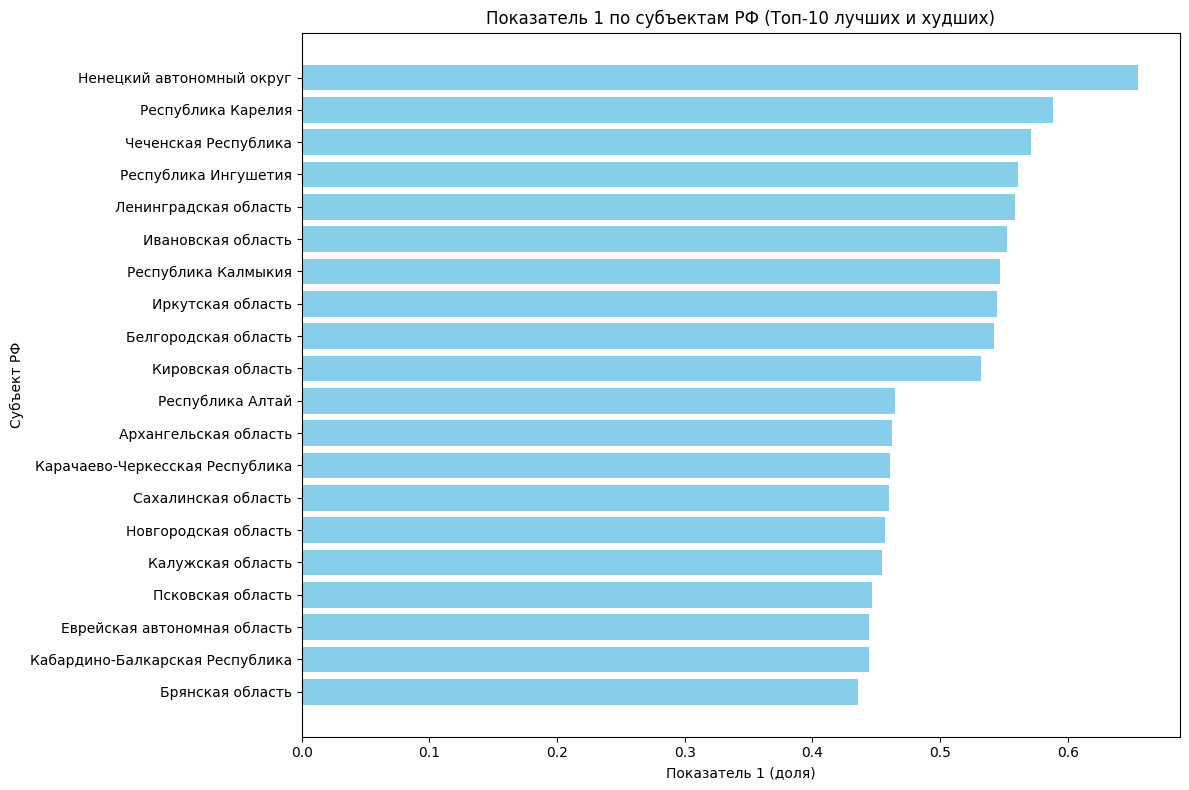

In [21]:
# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(plot_data['Субъект РФ'], plot_data['Показатель 1'], color='skyblue')
plt.xlabel('Показатель 1 (доля)')
plt.ylabel('Субъект РФ')
plt.title('Показатель 1 по субъектам РФ (Топ-10 лучших и худших)')
plt.gca().invert_yaxis()  # Чтобы лучшие были сверху
plt.tight_layout()
plt.show()